# ROLINE S/FTP LAN Kabel Cat 6 | Ethernet Netzwerkkabel mit RJ45 Stecker | Weiss 1 m

https://www.amazon.de/ROLINE-Kabel-Ethernet-Netzwerkkabel-Stecker/dp/B0056447OU?th=1

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [11]:
n_replicates = 50

In [12]:
eth_cable_name='Roline_1m_CAT6'

In [13]:
# -f m forces to show Megabit/sec
for i in range(n_replicates):
    !iperf3.exe -c 169.254.10.3 -p 5201 -f m > {eth_cable_name}/{eth_cable_name}_tcp_{i}.txt

In [14]:
res = pd.DataFrame()
for i in range(n_replicates):
    tmp = pd.read_csv(eth_cable_name + '/' + eth_cable_name + '_tcp_' + str(i) + '.txt', header = None, skiprows=3, skipfooter=7, delim_whitespace=True)
    tmp[8] = i
    res = res.append(tmp)

C:\Users\rdraschwandtner\AppData\Local\Continuum\new_anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
res = res.drop([0,1,3,4,5],axis=1)
res.columns = ['Interval','Bandwidth','unit', 'replicate']

In [16]:
res['Interval'] = res['Interval'].apply(lambda row: row[0] + '.0-' + row[5]+'.0')

In [17]:
res['mean'] = np.NaN
res['median'] = np.NaN
res['min'] = np.NaN
res['max'] = np.NaN

#res.loc[res.groupby('Interval')['Bandwidth'].mean()
for u in res['Interval'].unique():
    idcs = res['Interval'] == u
    vals = res[idcs]['Bandwidth']
    res.loc[idcs,['mean','median','min','max']] = [vals.mean(), vals.median(),vals.min(), vals.max()]

Text(8.4, 733.8, 'iperf3 -c <Server-IP> -p 5201 -f m')

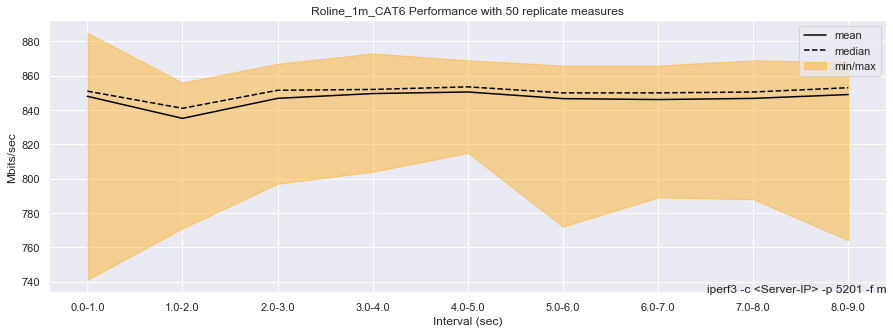

In [18]:
plt_df = res.groupby('Interval')['mean','median','min','max'].max()
plt.figure(figsize=(15,5))
plt.plot(plt_df.index, plt_df['mean'], color= 'black')
plt.plot(plt_df.index, plt_df['median'], color= 'black', linestyle = '--')
plt.fill_between(plt_df.index, y1=plt_df['max'], y2=plt_df['min'], color= 'orange', alpha = 0.4)
plt.title(eth_cable_name + ' Performance' + ' with ' +  str(n_replicates) + ' replicate measures')
plt.xlabel('Interval (sec)')
plt.ylabel('Mbits/sec')
plt.legend(['mean', 'median', 'min/max'])
plt.text(plt.xlim()[1],plt.ylim()[0],'iperf3 -c <Server-IP> -p 5201 -f m',horizontalalignment='right')